<h1><center>Redes Neuronales con Keras y Scikit</center></h1>


<center><i>Estructura de Redes Neuronales</i></center>

# <h1>Contenido</h1>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <ol>
        <li><a href="#perceptron">Perceptrón</a></li>          
        <li><a href="#iris">Dataset IRIS</a></li>
        <li><a href="#mlp">Multi Layer Perceptron (MLP)</a></li>
        <li><a href="#backward">Backward Propagation</a></li>
    </ol>
</div>
<br>
<hr>

## Perceptron

Representacion mas simple de una neurona, su salida es caracteristica binaria (1,0)  y depende de una combinacion lineal de las señales de entrada.

![perceptron_wiki](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fb%2Fb0%2FPerceptr%25C3%25B3n_5_unidades.svg%2F1200px-Perceptr%25C3%25B3n_5_unidades.svg.png&f=1&nofb=1)

## Dataset IRIS

El famoso set de datos IRIS contiene informacion de 3 diferentes especies (target):

- Iris-Setosa(0)
- Iris-Versicolor(1)
- Iris-Virginica(2)

El dataset contiene 150 muestras (50 por cada especie) y 4 caracteristicas:

- Longitud del sepalo (cm)
- Ancho del sepalo (cm)
- Longitud del petalo (cm)
- Ancho del petalo (cm)

![IRIS](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1000%2F1*gwmXliaxIBkY4NQBhoe9JQ.png&f=1&nofb=1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

In [7]:
#Creamos una variable para cargar el dataset
iris = load_iris()

In [8]:
# Exploramos el dataset (50 datos de las 3 categorias)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Treaemos una muestra de la informacion disponible de los primeros 5 elementos
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
# Creamos sub sub-dataset con la longitud y ancho del petalo
data = iris.data[:,(2,3)]

In [11]:
# definimos nuestras etiquetas
labels = iris.target

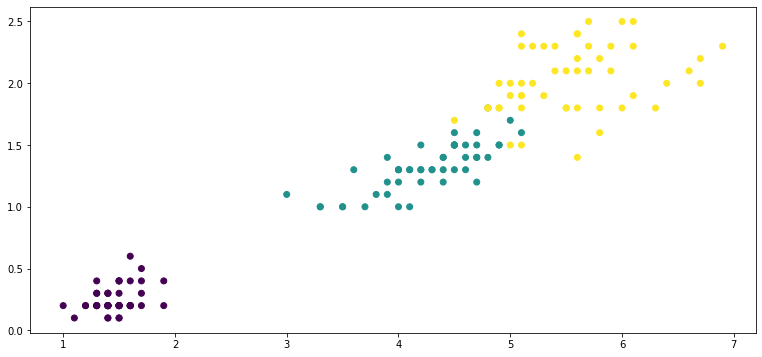

In [12]:
# Graficamos un diagrama de dispersion (puntos/scatter)
plt.figure(figsize=(13,6))
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

Cada etiqueta/color representa una de las especies en nuestro scatterplot, ya que cada una tiene caracteristicas muy especificas

Ahora vamos intentar a que el perceptron pronostique si ciertas muestras pertenecen a una especie en particular 

In [13]:
# Creamos la variable objetivo
y = (iris.target == 2).astype(np.int)

In [16]:
# Creamos una instancia de la clase Perceptron de Scikit-Learn
test_perceptron = Perceptron()

In [17]:
# Entrenamos el modelo, le pasamos la data y nuestro objetivo
test_perceptron.fit(data, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# Adicional a la clase creo el diccionario para identificar por nombre
especies = {0: ' Iris-Setosa', 
            1:'Iris-Versicolor',
            2: 'Iris-Virginica'}

In [28]:
# Realizamos la primer prediccion simulando una especie de 5.1 cm de largo y 2 cm de ancho
y1_pred = test_perceptron.predict([[5.1, 2]])
print(f'Prediccion 1: {y1_pred} |{especies[y1_pred[0]]}')

Prediccion 1: [1] | Iris-Versicolor


In [29]:
# Prediccion 2
y2_pred = test_perceptron.predict([[1.4, 0.2]])
print(f'Prediccion 1: {y2_pred} | {especies[y2_pred[0]]}')

Prediccion 1: [0] |  Iris-Setosa


## Ejercicio propuesto explotar la data en terminos del sepalo y hacer las predicciones.

In [31]:
#Largo y ancho del sepalo
data1 = iris.data[:,(0,1)]

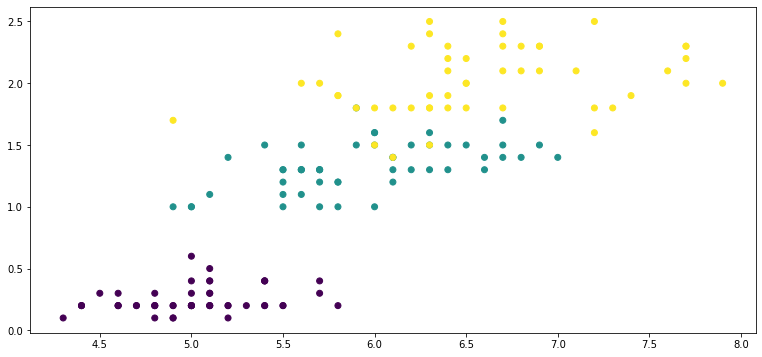

In [32]:
# Graficamos el diagrama de dispersion para los datos del sepalo
plt.figure(figsize=(13,6))
plt.scatter(data1[:,0], data[:,1], c=labels)
plt.show()

In [33]:
# Creamos una instancia de la clase Perceptron de Scikit-Learn
test_perceptron2 = Perceptron()

In [34]:
# Creamos la variable objetivo
z = (iris.target == 2).astype(np.int)

In [35]:
# Entrenamos el modelo, le pasamos la data y nuestro objetivo en terminos del sepalo
test_perceptron2.fit(da1ta1, z)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
# Realizamos la primer prediccion simulando una especie de 
# 5.1 cm de largo y 2 cm de ancho para el sepalo
z1_pred = test_perceptron2.predict([[5.1, 2]])
print(f'Prediccion 1: {z1_pred} | {especies[z1_pred[0]]}')

Prediccion 1: [0] |  Iris-Setosa


In [48]:
# Prediccion 2
z2_pred = test_perceptron2.predict([[8, 2]])
print(f'Prediccion 1: {z2_pred} | {especies[z2_pred[0]]}')

Prediccion 1: [1] | Iris-Versicolor


Este tipo de arquitectura funciona cuando existe una linealidad muy marcada entre los datos, para estructuras mas complejas debemos utilizar el multi
-layer perceptron (varias capas de la misma arquitectura dedicadas a recoger diversas caracteristicas)

![multilayer-perceptron](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flh4.googleusercontent.com%2FPHkRty8wqYNr0DZNXb7qV3j37ZCDfee48epb6K9OVlt7SUsR7qKJIUW7y_Q9YwF1gvfXsFZfq_kd1lSfy6FmErlt4yWjWz-7tswbLfPw8phr-R184lp1St-HJlYvmDGCTpVCeMnU&f=1&nofb=1)

El algoritmo mediante el cual se lleva a cabo este entrenamiento se llama **Forward and Backward Propagation**